## make MNIST data to RGB images

[참고자료](https://www.wouterbulten.nl/blog/tech/getting-started-with-gans-2-colorful-mnist/)

In [24]:
import argparse
import os
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from model import RobustModel
import numpy as np
import scipy.ndimage
from PIL import Image as PILImage

# dataset
import torchvision 
from torchvision import datasets
from torchvision import transforms

import cv2

In [25]:
batch_size = 10

In [26]:
train_data = datasets.MNIST(root= '..\datasets', train= True, download= True, transform= transforms.ToTensor())
test_data = datasets.MNIST(root= '..\datasets', train= False, download= True, transform= transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [27]:
# Read Lena image
lena = PILImage.open('resources/lena.png')

In [29]:
datas = []
labels = []
for i, data in enumerate(train_loader):
    x_train, label = data
    # Select random batch (WxHxC)
    batch_raw = x_train.reshape((batch_size, 28, 28, 1))
    
    # Resize
    batch_resized = np.asarray([scipy.ndimage.zoom(image, (2.3, 2.3, 1), order=1) for image in batch_raw])
    
    # Extend to RGB
    batch_rgb = np.concatenate([batch_resized, batch_resized, batch_resized], axis=3)
    
    # Make binary
    batch_binary = (batch_rgb > 0.5)
    
    batch = np.zeros((batch_size, 64, 64, 3))
    for i in range(batch_size):
        # Take a random crop of the Lena image (background)
        x_c = np.random.randint(0, lena.size[0] - 64)
        y_c = np.random.randint(0, lena.size[1] - 64)
        image = lena.crop((x_c, y_c, x_c + 64, y_c + 64))
        image = np.asarray(image) / 255.0

        # Change color distribution
        for j in range(3):
            image[:, :, j] = (image[:, :, j] + np.random.uniform(0, 1)) / 2.0

        # Invert the colors at the location of the number
        image[batch_binary[i]] = 1 - image[batch_binary[i]]
        batch[i] = image

        datas.append(image)
        labels.append(label[i])
    

(28, 28, 3)
[[[0.57975661 0.33107946 0.6323204 ]
  [0.5997346  0.34216389 0.62972937]
  [0.5997246  0.34072331 0.63093985]
  ...
  [0.59092108 0.33955285 0.63039963]
  [0.59843408 0.34520511 0.63468135]
  [0.60169539 0.3544488  0.6460559 ]]

 [[0.58561896 0.32485697 0.62146606]
  [0.60055493 0.34170371 0.63360091]
  [0.60161536 0.34153364 0.63028959]
  ...
  [0.62831604 0.5116817  0.77445726]
  [0.61470059 0.49099342 0.76625397]
  [0.57970659 0.37651763 0.67966934]]

 [[0.59032084 0.33540118 0.63201028]
  [0.61079903 0.33935277 0.62479739]
  [0.60559695 0.34460487 0.63133001]
  ...
  [0.62251371 0.50264808 0.76234241]
  [0.62566497 0.5094308  0.76388303]
  [0.640731   0.52776813 0.78272056]]

 ...

 [[0.55306594 0.29292419 0.59769655]
  [0.5139703  0.25675973 0.59421516]
  [0.69077102 0.55946081 0.76573377]
  ...
  [0.61678142 0.44825633 0.76623397]
  [0.58850011 0.41365249 0.76524357]
  [0.53281784 0.37897862 0.75737042]]

 [[0.55570699 0.29710587 0.60386902]
  [0.53191748 0.27670771 

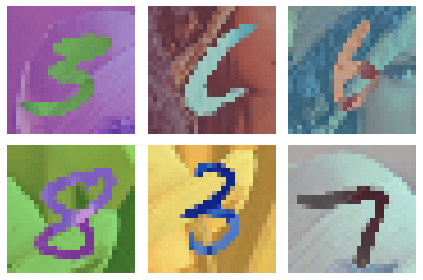

In [69]:
for i in range(6):
    plt.subplot(2, 6 // 2, i+1)
    data = cv2.resize(datas[i], dsize=(28,28))
    print(data.shape)
    # print(data)
    plt.imshow(data)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [37]:
# os.mkdir("./resources/color_images")
for i in range(10):
    os.mkdir("./resources/color_images/"+str(i))

In [82]:
for i,data in enumerate(datas):
    print(data.shape)
    data = cv2.resize(data, dsize=(28,28))
    print(data.shape)
    break
    # cv2.imwrite("./resources/color_images/"+str(labels[i].item())+"/"+str(i)+".jpg", data*255)

(64, 64, 3)
(28, 28, 3)


## test data load

In [78]:
trans = transforms.Compose([transforms.ToTensor()])
# trans = transforms.Compose([[transforms.Resize((28,28,3)),
#                             transforms.ToTensor(),
#                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]])
trainset = torchvision.dataset = torchvision.datasets.ImageFolder('./resources/color_images', transform=trans)

In [47]:
len(trainset)

60000

In [48]:
classes = trainset.classes
classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [80]:
# DataLoader를 통해 데이터 올리기
trainloader = DataLoader(trainset, batch_size = 10)

In [84]:
def imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img,(1,2,0)))

torch.Size([10, 3, 28, 28])


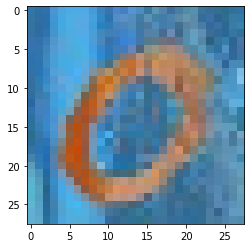

In [85]:
for i in trainloader:
    image, label = i
    print(image.shape)
    for data in image:
        imshow(data)
        break
    break